In [3]:
from IPython.display import Math, Audio
from scipy.io.wavfile import read
import numpy as np
from librosa import frames_to_time, stft, amplitude_to_db, display
from librosa.feature import zero_crossing_rate, mfcc, spectral_bandwidth, spectral_centroid, spectral_rolloff, chroma_stft
import matplotlib.pyplot as plt

# Feature extraction and analysis

### Feature types

Feature extraction is a technological method that attempts to find and rank the "amount" of some (musical) feature's presence in an audio signal. A feature is simply a statistic. Think of is as a "digital signature" for some musical factor. 

Features should be "informative". This means that we are looking for features that can characterize the behaviour of what we are trying to model. For instance, if we want to model the weather, features like temperature, humidity and wind are informative (they are related to the problem). By contrast, the result of a football game will not be an informative feature because it doesn't affect the weather.



* Onsets 
* Timing data (e.g., tempo)
* Loudness
* Zero-crossing rate
* Key/frequency data (e.g., chromagram)
* Spectral features (e.g., centroid - bright/dark?, rolloff, MFCCs, spectral spread, spectral envelope, flux)
* RMS (root mean square - loudness?)

We can compute the feature as an averaged value over an entire song, or, more typically, we might compute the feature just for a small window of audio. This is often referred to as an **instantaneous feature**

Commonly in music and signal analysis, we will calculate many "low level features". These are features that in and of themselves don't mean much in isolation, and often don't translate well (directly, at least) to some perceptual phenomenon. However, they often can be used to estimate higher-level (more musically or perceptually relevant) features.


#### Short-term vs long-term features
Short-term or "instantaneous" features are those that are calculated on a frame-by-frame basis. "Mid term" features are usually calculations or statistics that come *from* the averaging or addition of short term statistics, and long-term (or "global") statistics are ones that describe the audio signal or file as a whole.

### Comparing Drums and Saxophone

We are going to use features to compare two audio files throughout this lecture.

Note: whenever we are comparing features, we need to make sure we normalize our audio so that it is a more direct comparison.

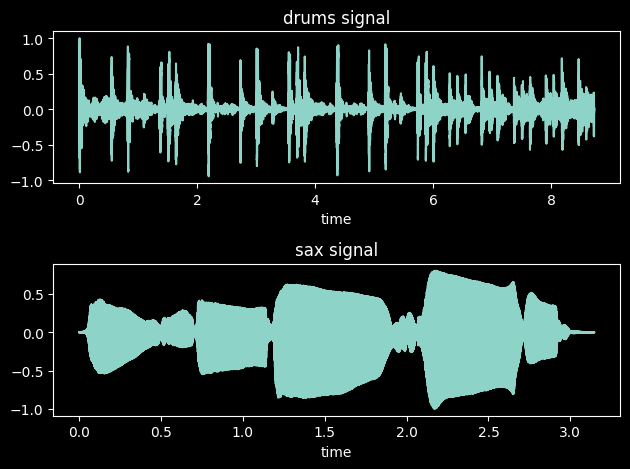

In [4]:
(drums_fs, x) = read('../audio/80spopDrums.wav')
(sax_fs, x2) = read('../audio/sax-phrase-short.wav')
drums_time = np.arange(0,x.size)/drums_fs
sax_time = np.arange(0,x2.size)/sax_fs
drums_data = x/np.max(abs(x)) # normalize amplitudes to between -1 and 1
sax_data = x2/np.max(abs(x2))
fig, ax = plt.subplots(2)
ax[0].plot(drums_time, drums_data)
ax[0].set_title('drums signal')
ax[0].set_xlabel('time')

ax[1].plot(sax_time,sax_data)
ax[1].set_title('sax signal')
ax[1].set_xlabel('time')
plt.tight_layout()

In [ ]:
Audio(x,rate=drums_fs)

In [20]:
Audio(x2, rate=sax_fs)

## Features extracted from time domain

In general, the time-domain audio features are extracted directly from the time domain representation (samples) of the audio signal. Common time-domain features are the short-term energy
and short-term zero-crossing rate. 

Even though these are features that are calculated from the time domain, the resulting feature usually tells us something about the *spectral* content of the sound. So these are actually **spectral features**!

## Energy

The term 'energy' is used to represent “strength of the signal” or intensity. There are two common ways to measure the strength: **energy** and **root mean square energy**. 

Let $x_{i}(n)$ be the sequence of audio samples of the *ith* frame. The short-term **energy** is computed
according to the equation:

$$E(i) = \sum_{n} |x_{i}(n)|^2$$

Where $E(i)$ is the energy of a single frame, and the resulting vector, E, represents the energy of the signal.

#### Root Mean Square Energy (RMSE)

The root-mean-square energy (RMSE) is the more common intensity measure of a signal. It is defined as:

$$RMS(i) = \sqrt{ \frac{1}{WL} \sum_{n}^{WL} \left| x_i(n) \right|^2 } $$

the RMS of a signal is a really just a value used to calculate the average, or continuous, power of a signal. Typical block lengths for the RMS calculation are between 100-500ms. This 'window length' is sometimes referred to as the **integration time.**

In [5]:
#Energy:
hop_length = 2048
frame_length = 4096

energy = np.array([])
for i in range(0,len(drums_data),hop_length): #iterate through data frame by frame, shifting by factor of hop_length
    e_i = sum(abs(drums_data[i:i+frame_length]**2)) #sum across samples of each frame
    energy = np.append(energy,e_i)
    
energy.shape # shape should be number of frames long

(188,)

In [6]:
#And RMSE:

rmse = np.array([])
for i in range(0,len(drums_data),hop_length): #iterate through data frame by frame, shifting by factor of hop_length
    #rms_i = np.sqrt(1/frame_length * sum(abs(data[i:i+frame_length]**2))) #sum across samples of each frame
    #note the above is the same as simply taking the mean since we are summing values and dividing by total:
    rms_i = np.sqrt(np.mean(abs(drums_data[i:i+frame_length]**2)))
    rmse = np.append(rmse,rms_i)

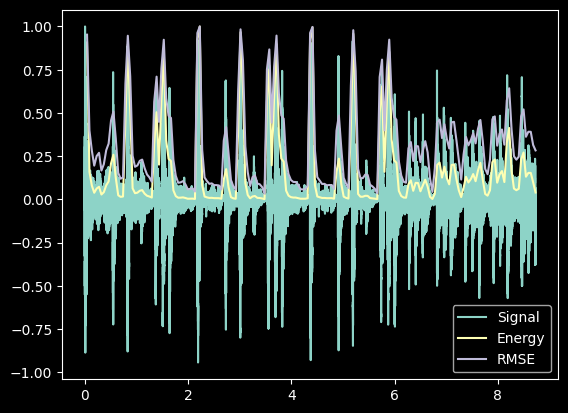

In [7]:
#plot signal wrt time underneath
plt.plot(drums_time,drums_data, label='Signal')

#convert frames to time with librosa
frames = range(1,len(energy)+1) #vector of frames as iterable
t = frames_to_time(frames, sr=drums_fs, hop_length=hop_length)

plt.plot(t,energy/energy.max(),label='Energy') #normalize amplitudes
plt.plot(t,rmse/rmse.max(),label='RMSE')
plt.legend();

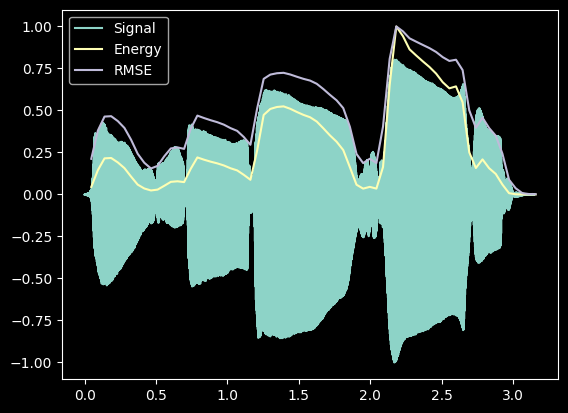

In [22]:
#Energy:
hop_length = 2048
frame_length = 4096

energy = np.array([])
for i in range(0,len(sax_data),hop_length): #iterate through data frame by frame, shifting by factor of hop_length
    e_i = sum(abs(sax_data[i:i+frame_length]**2)) #sum across samples of each frame
    energy = np.append(energy,e_i)
    
energy.shape # shape should be number of frames long

#And RMSE:
rmse = np.array([])
for i in range(0,len(sax_data),hop_length): #iterate through data frame by frame, shifting by factor of hop_length
    #rms_i = np.sqrt(1/frame_length * sum(abs(data[i:i+frame_length]**2))) #sum across samples of each frame
    #note the above is the same as simply taking the mean since we are summing values and dividing by total:
    rms_i = np.sqrt(np.mean(abs(sax_data[i:i+frame_length]**2)))
    rmse = np.append(rmse,rms_i)
    
#plot signal wrt time underneath
plt.plot(sax_time,sax_data, label='Signal')

#convert frames to time with librosa
frames = range(1,len(energy)+1) #vector of frames as iterable
t = frames_to_time(frames, sr=sax_fs, hop_length=hop_length)

plt.plot(t,energy/energy.max(),label='Energy') #normalize amplitudes
plt.plot(t,rmse/rmse.max(),label='RMSE')
plt.legend()

#### Comparing drums and sax

There is greater variability in the drum energy/RMS compared to the sax. This can indicate the percussive transients

#### Short-term energy of signal and relation to "speechiness"
Energy is typically used to discover silence in a signal, dynamic range, and changes in variation in intensity.

Short-term energy is expected to exhibit relatively high variation over successive
speech frames, i.e. the energy envelope is expected to alternate 
between high and low energy states. This can be explained by the fact that
speech signals contain weak phonemes and short periods of silence between
words. However, music tends to have a more consistent energy distribution.

Typically when computing short-term energy for speech or music, we will use a 50% overlap and a typical frame size of approximately 100 to 250ms.

## Zero Crossing Rate (ZCR)
The Zero-Crossing Rate (ZCR) of an audio frame is the rate of sign-changes
of the signal during the frame. In other words, it is the number of times the
signal changes value or "crosses zero", from positive to negative and vice versa, divided by
the length of the frame. 

$$ ZC(i) = \frac{1}{2N} \sum_{n}^{N-1}|\ sign[x(n) - sign[x(n-1)]\ |$$


If the signal is changing signs rapidly, the signal likely contains a lot of high frequency content.
In addition, the more the zero crossing rate *varies* across frames, we can assume the signal is less periodic. In contrast, fairly constant values from frame to frame are seen when the pitch content is stable.

(ZCR is commonly computed at 10-30ms frames with a 50% overlap)

#### ZCR and noise (or "tonalness")
ZCR can be interpreted as a measure of the noisiness of a signal. It is high
for noisy parts and low for more "tonal" parts. It is
also known to reflect, in a rather coarse manner, the frequency characteristics
of a signal since it effectively measures the dominant frequency of a frame.

Since it is easy to compute, it has been adopted for numerous applications, e.g.:
speech-music discrimination, speech detection, and music genre
classification.

For example, noise will have a more fluctuating ZCR than speech, which in turn as a higher ZCR rate than (monophonic) musical signals; therefore it depends a bit on context. A clip with a fluctuating zero-crossing rate therefore may contain a lot of speech, or may contain a lot of percussion, while a flatter, higher ZCR would suggest a lot of noise.

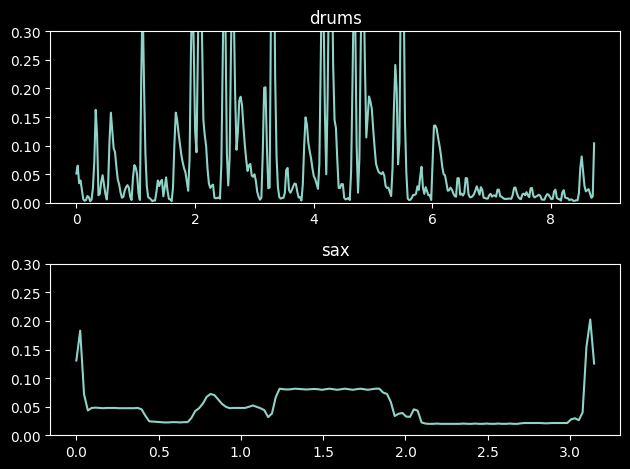

In [23]:
#librosa's ZCR feature uses a default frame size of 2048 and hop of 512
a = zero_crossing_rate(drums_data.astype(float), hop_length=1024)
b = zero_crossing_rate(sax_data.astype(float), hop_length=1024)

ax1 = np.linspace(0,len(drums_data)/drums_fs,len(a[0]))
ax2 = np.linspace(0,len(sax_data)/sax_fs,len(b[0]))

plt.subplot(2,1,1)
plt.plot(ax1, a[0])
plt.ylim(0,0.3)
plt.title('drums')
plt.subplot(2,1,2)
plt.plot(ax2,b[0])
plt.ylim(0,0.3)
plt.title('sax')
plt.tight_layout()

#### Comparing drums and sax

The drums ZCR is higher and has more variability across frames. This indicates noisier, higher frequency content.

## Features from Frequency domain

### Spectral Centroid
Spectral centroid describes the "gravitational center" of spectral energy and is closely related to the brightness of a single tone. Perceptually, "nasality" is strongly correlated with spectral centroid. This feature has one of the highest impact on perceptual discrimination of timbre.

In general, high centroid values correspond to spectra with more high-frequency energy and to 'nasal' sounds, while low centroid values correspond to spectra with more low-frequency energy and to 'acute' or 'dull'  sounds.  Qualitatively, spectral centroid can be likened to a spectrum's "center of gravity" or "balance point" of the spectrum with amplitude values representing "weights" and frequency values representing the "position" of each weight along a balance scale.

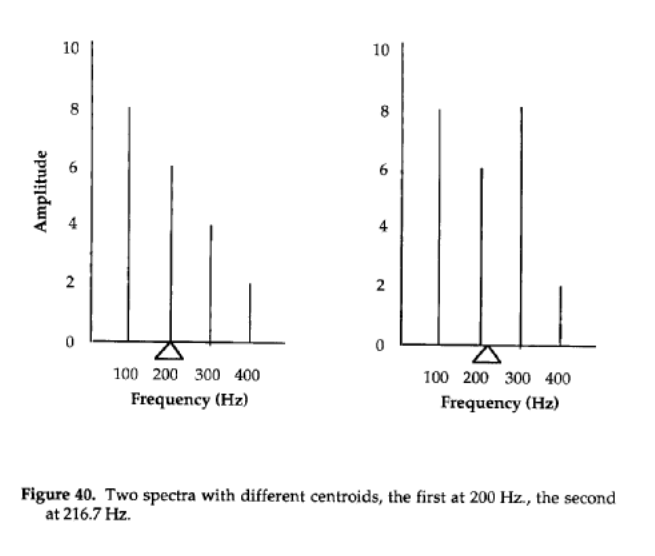

In [34]:
from IPython.display import Image
Image('../images/centroid.png', embed=True)

Calculating Centroid - Centroid is calculated by taking the sum of the frequencies weighted by (i.e. multiplied by) the magnitude spectrum, divided by the sums of the magnitudes. In other words, it is a weighted average. E.g.:

The calculation for the first spectrum in the example above is

$(8*100 + 6*200 + 4*300 + 2*400)/(8 + 6 + 4 + 2)$

...while the second is calculated as

$(8*100 + 6*200 + 8*300 + 2*400)/(8 + 6 + 8 + 2)$

This can be represented by the equation:
    $$C_n = \frac{\sum_{n=0}^{N-1}k(n)*x(n)}{\sum_{n=0}^{N-1}x(n)}$$
    
Where $k(n)$ is the center frequency of the $n$th bin, and $x(n)$ is the magnitude of the $n$th bin.

Text(0, 0.5, 'Hz')

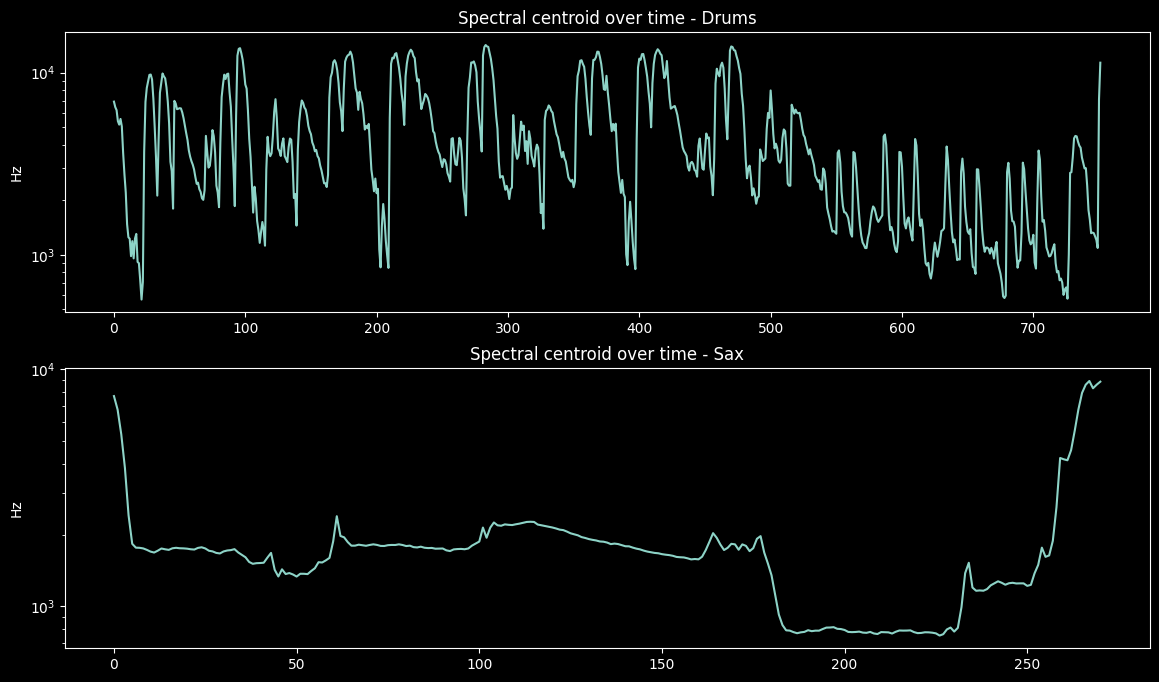

In [8]:
a = spectral_centroid(y=drums_data.astype(float), sr=drums_fs)
b = spectral_centroid(y=sax_data.astype(float), sr=sax_fs)

plt.figure(figsize = (14,8))
plt.subplot(2,1,1)
plt.semilogy(a[0])
plt.title('Spectral centroid over time - Drums')
plt.ylabel('Hz')
plt.subplot(2,1,2)
plt.semilogy(b[0])
plt.title('Spectral centroid over time - Sax')
plt.ylabel('Hz')

#### Comparing Sax and Drums

Drums have a higher and more varied centroid across frames. This indicates higher frequency energy and lack of tonality.

### Bandwidth and Spectral Spread
Bandwidth is a measure of what range of frequencies are present in a signal. This is sometimes used to discriminate between speech and music. (Music typically will have a larger bandwidth than speech).

We can also calculate it manually if we have the complete spectrum of the signal. **The bandwidth is simply the difference between the highest and lowest frequency.** Note that we have more sensitive measures, so we typically don't use this one as a feature so often.

`librosa.feature.spectral_bandwidth` is a function for calculating bandwidth, though it balances the bandwidth relative to the spectral centroid. This is more akin to spectral spread with p=2 (the default param).

The Spectral Spread, sometimes also referred to as instantaneous bandwidth, describes how the spectrum is concentrated around the Spectral Centroid.

$$S_n = \sqrt{\frac{\sum_{k=1}^{Wf_L}(k-C_n)^2 X_n(k)}{\sum_{k=1}^{Wf_L}X_n(k)}}$$
where $C_n$ is the sprectral centroid for the frame $n$


It is a very technical description of spectral shape, but has been shown that spectral spread contributes to the perception of "roughness".

**Possible role in genre classification:**

Excerpts of electronic and popular music are (usually) more widely spread around their centroid than classical and jazz music (for example). 

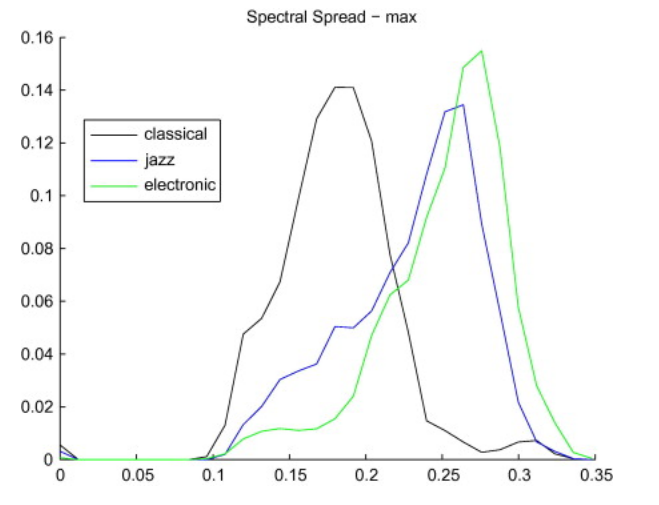

In [ ]:
Image('../images/spectralSpread.png')

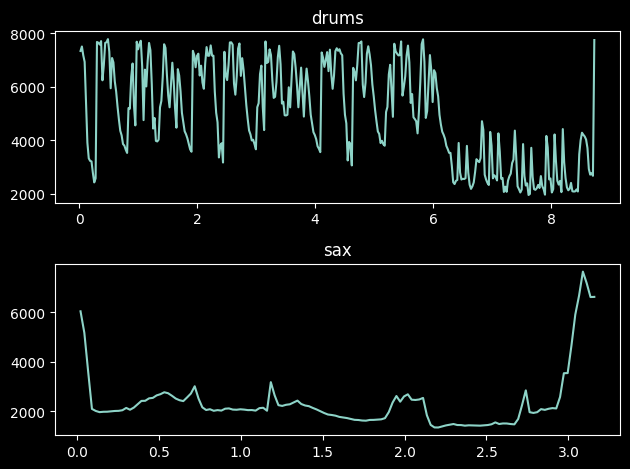

In [33]:
frame_length = 2048
hop_length = 1024
ban_drums = spectral_bandwidth(y=drums_data, sr=drums_fs, n_fft=frame_length, hop_length=hop_length)[0]
ban_sax = spectral_bandwidth(y=sax_data, sr=sax_fs, n_fft=frame_length, hop_length=hop_length)[0]

frames = range(1,len(ban_drums)+1) #vector of frames as iterable
drums_t = frames_to_time(frames, sr=drums_fs, hop_length=hop_length)

frames = range(1,len(ban_sax)+1) #vector of frames as iterable
sax_t = frames_to_time(frames, sr=sax_fs, hop_length=hop_length)

plt.subplot(2,1,1)
plt.plot(drums_t, ban_drums)
plt.title('drums')
plt.subplot(2,1,2)
plt.plot(sax_t, ban_sax)
plt.title('sax')
plt.tight_layout()

#### Comparing Sax and Drums

Drums have a larger spread across frames. Indicating greater distribution of energy across the spectrum. The sax has a smaller spread indicating energy clustered around the centroid (presumably tonal/harmonic).

### Spectral Rolloff
The spectral rolloff point is a more conservative measure of bandwidth. It measures the frequency bin below which most (typically 85-95%) of the spectral energy exists. It is sometimes used to discriminate between different types of music tracks. The result of spectral rolloff is thus a bin index (which can be converted to Hz).

`librosa` also has a function for calculating this feature.

The formula for calculating can be defined as follows:
$$ \sum_{n=0}^{R_n -1} = \sum_{n=0}^{N-1} .85 * {|X[k]|_n}$$

Where $R_n$ is the frequency below which 85% of the spectrum is concentrated.

see [Music Data Mining, p.52](https://ebookcentral-proquest-com.prx.library.gatech.edu/lib/gatech/reader.action?docID=1633711&ppg=68)

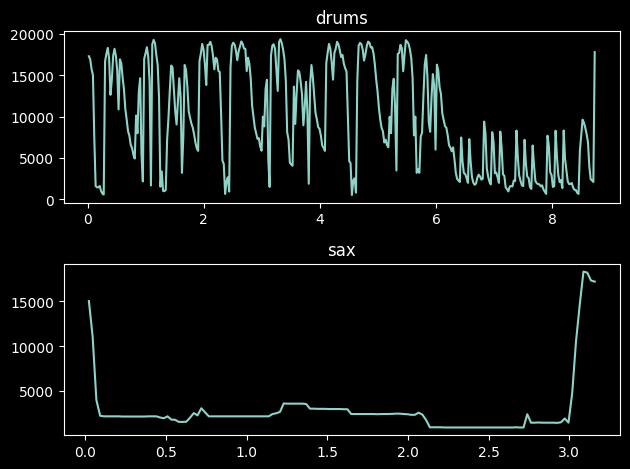

In [32]:
frame_length = 2048
hop_length = 1024
# default roll percent is .85
ban_drums = spectral_rolloff(y=drums_data, sr=drums_fs, n_fft=frame_length, hop_length=hop_length)[0]
ban_sax = spectral_rolloff(y=sax_data, sr=sax_fs, n_fft=frame_length, hop_length=hop_length)[0]

frames = range(1,len(ban_drums)+1) #vector of frames as iterable
drums_t = frames_to_time(frames, sr=drums_fs, hop_length=hop_length)

frames = range(1,len(ban_sax)+1) #vector of frames as iterable
sax_t = frames_to_time(frames, sr=sax_fs, hop_length=hop_length)

plt.subplot(2,1,1)
plt.plot(drums_t, ban_drums)
plt.title('drums')
plt.subplot(2,1,2)
plt.plot(sax_t, ban_sax)
plt.title('sax')
plt.tight_layout()

#### Comparing Sax and Drums

Drums have a higher rolloff indicating the energy at higher frequencies as well as variation across frames. Sax has more consistency and lower rolloff.

### Spectral Flux
Just like signal time-variance can be represented through a signal's envelope, spectral time-variance (spectral flux) is manifested as changes in the frequency and amplitude of a complex tone's components with time, and can be represented through time-variant spectra, or individual component amplitude/frequency envelopes. 

Spectral Flux measures change in the spectral "shape"; or how quickly the power spectrum of a signal is changing. It is calculated by comparing the current value of each magnitude spectrum bin in the current frame from the corresponding value of the magnitude spectrum in the previous frame. Each of these differences is then squared, and the result is the sum of the squares. Like energy and RMSE we commonly take the average by taking the square root and dividing by the total number of bins/2:

$$ SF = \frac{\sqrt{\sum(|X(k,n)| - |X(k,n -1)|)^2}}{k/2} $$

The spectral flux can be used to determine the timbre of an audio signal, or in onset detection, and like ZCR is also used in speech detection since spectral flux is higher for speech than music. 

Text(0, 0.5, 'Flux')

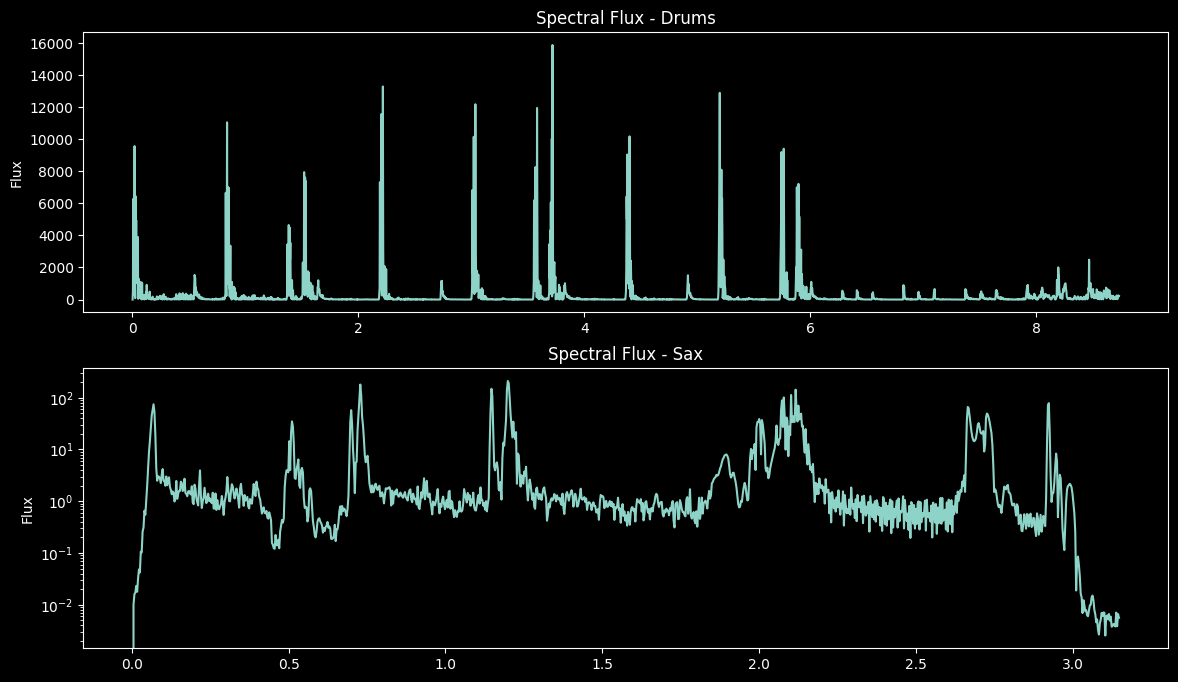

In [60]:
frame_length = 512
hop_length = 128

drums_matrix = stft(drums_data, n_fft=frame_length, hop_length=hop_length)

magnitude = np.abs(drums_matrix)

# Frame-to-frame difference
diff = np.diff(magnitude, axis=1)

# Square and sum across frequency bins
drums_flux = np.sum(diff**2, axis=0)

# Pad so output matches frame count
drums_flux = np.concatenate(([0], drums_flux))

frames = range(1,len(drums_flux)+1) #vector of frames as iterable
drums_t = frames_to_time(frames, sr=drums_fs, hop_length=hop_length)

sax_matrix = stft(sax_data, n_fft=frame_length, hop_length=hop_length)

magnitude = np.abs(sax_matrix)

# Frame-to-frame difference
diff = np.diff(magnitude, axis=1)

# Square and sum across frequency bins
sax_flux = np.sum(diff**2, axis=0)

# Pad so output matches frame count
sax_flux = np.concatenate(([0], sax_flux))

frames = range(1,len(sax_flux)+1) #vector of frames as iterable
sax_t = frames_to_time(frames, sr=sax_fs, hop_length=hop_length)

plt.figure(figsize = (14,8))
plt.subplot(2,1,1)
plt.plot(drums_t, drums_flux)
plt.title('Spectral Flux - Drums')
plt.ylabel('Flux')
plt.subplot(2,1,2)
plt.semilogy(sax_t, sax_flux)
plt.title('Spectral Flux - Sax')
plt.ylabel('Flux')

#### Comparing Drums and Sax

Drums and sax have high flux at transients/onsets. During sustained sections for the sax, we see smoother flux (since spectral content is not really changing).

### Mel Frequency Cepstral Coefficients
The Mel Frequency Cepstral Coefficients (MFCCs) are a compact (but complicated) representation
of the shape of the spectral envelope of an audio signal based on the **mel frequecy scale**

A **mel** is a unit of pitch defined so that pairs of sounds which are
perceptually equidistant in pitch are separated by an equal number of mels. In other words, the mel
scale is a perceptually motivated scale of frequency intervals, which, if
judged by a human listener, are (supposedly) perceived to be equally spaced.

The MFCCs basically capture the shape of the spectrum, on a scale that emphasizes regions of the spectrum where more detail is needed, and discard some of the unimportant details.

#### History of the Mel
The scale was derived from experiments with human listeners. However, these experiments were done in the 1950s, and some modern audiologists think the scale is biased. According to this scale, in order to hear an octave doubling, you use the mel scale as the reference -- so 1000 mels doubled would equal 2000 mels, which should sound like an octave jump. This translates (if you look up the mel to Hz using the chart) to 1000Hz and 3500Hz!! (Use your sine tone generators to test this for yourself!)

Notice the scale appears roughly linear through ~700-1000Hz after which it becomes closer to logarithmic.

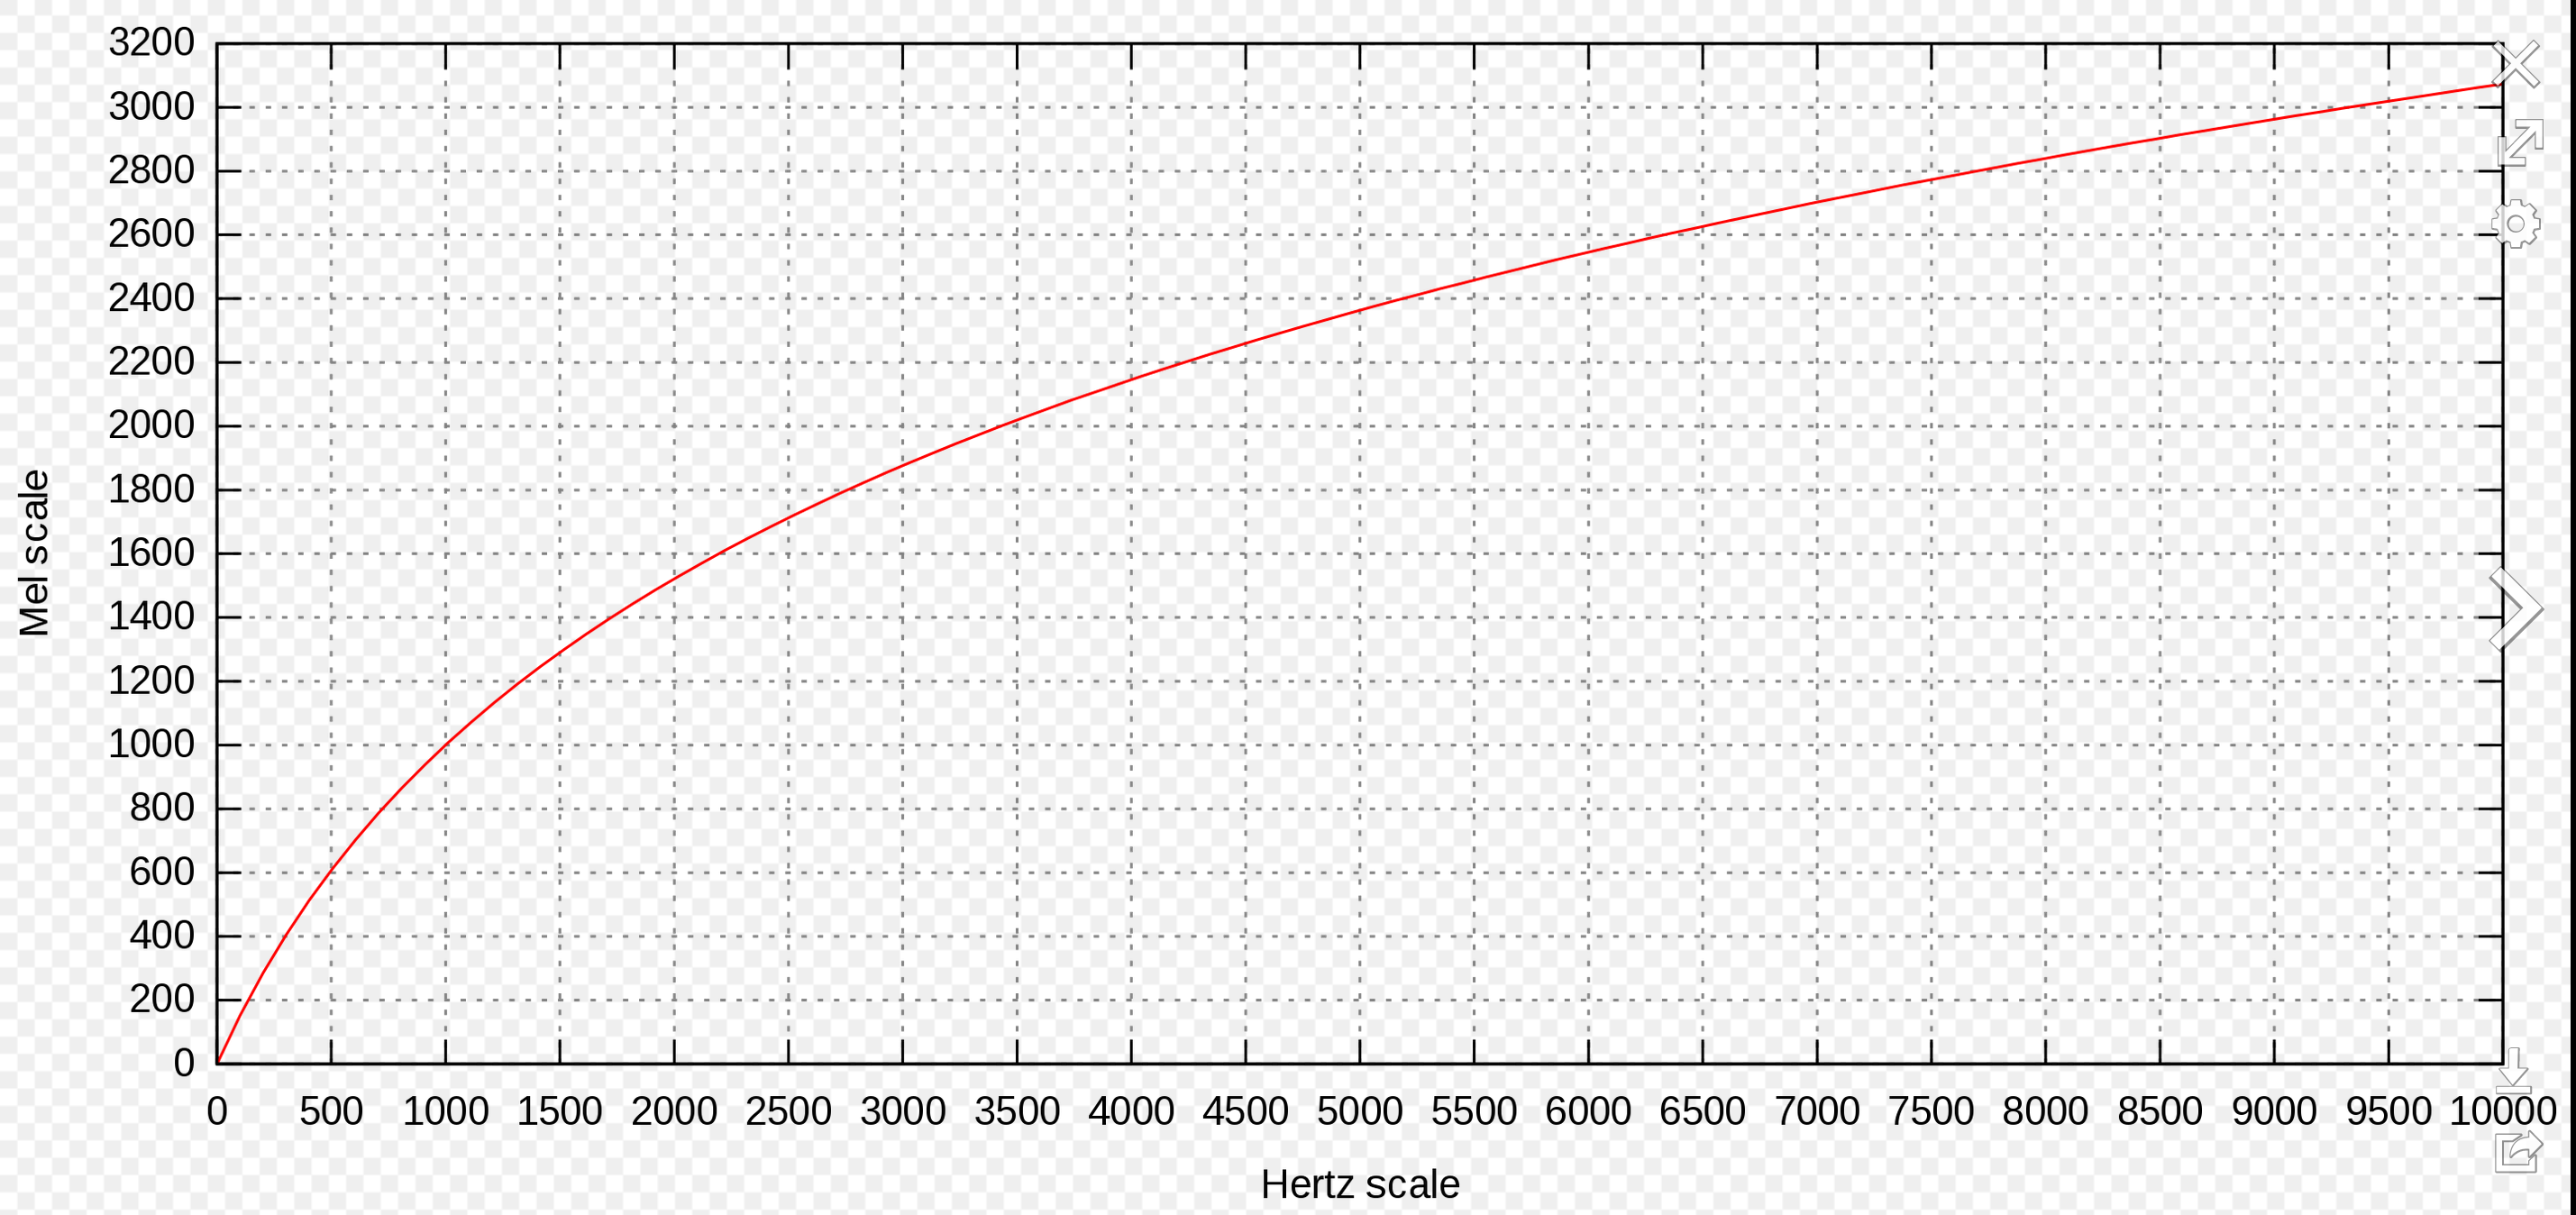

In [61]:
Image('../images/melScale.png')

### Computing the Mel Spectrogram

We first need to determine how many filter banks or mel bands we want. This is usually 40.

Then, we actually build those filter banks. We set our end points by converting our lowest and highest frequencies to Mels. Then equally space out our remain mel banks and convert back to frequency in Hz.

Here is the conversion. This keeps 1000 Hz = 1000 mel
$$m= 2595*log_{10}(1+\frac{f}{700})$$
$$f= 700 *(10^{\frac{m}{2595}}-1)

In [64]:
Image(url='https://siggigue.github.io/pyfilterbank/_images/melbank-1_00.png')

#### MFCCs
The mel frequency cepstral coefficients (MFCCs) of a signal are a small set of coefficients that concisely describe model the overall shape of a spectral envelope. In MIR, they are widely used in speech recognition systems. They have proven useful in a variety of tasks including speech/music discrimination and genre classification.

The mel scale gets segmented into $Q$ bands of constant (mel) width, and the mel frequencies within each band are then aggregated. On the linear Hz scale this yeilds $Q$ bands with non-uniform bandwidth which are supposed to relate closely to the critical bands. The bands are formed using half-overlapping triangular weighting functions with the typical number of total bands usually set to 40, where the first ~13 are roughly equally spaced (up through 1000Hz) after which the remaining 27 mel bands are arranged logarithmically.

#### Computing MFCCs

To actually compute the MFCCs (Mel Frequency Cepstrum Coefficients), we take the log of the power of each filterbank energy (to account for the non-linear relationship between the sound pressure level and the perceived mel spectrum loudness), and then perform a Discrete Cosine Transform (akin to a DFT) on those log filterbank energies as if it were a signal. 

In other words, we are taking a spectrum of a spectrum ("cepstrum"). The word 'cepstrum' is a play on words reversing 'spec'. The Mel cepstrum is because we first transform to the mel scale.

So we...
- Take the STFT of our signal which puts us in the frequency domain
- Apply the mel filterbanks which highlights the perceptually important frequencies (and diminishes the others)
- Take the log power of the output which scales the dynamic range into something more perceptually relevant
- Apply the DCT to the output which reduces redundancy in the filterbank coefficients and helps pick out the most relevant features

Thus, MFCCs are a "multidimensional" feature meaning the calculation will return multiple values (one per filterbank) for every analysis (STFT) window. The number of filterbanks can vary (some implementations seem to only use 26 and not 40). In addition, the actual total number of coefficients you retain is variable. For instance, you could choose to use only 20 coefficients instead of 40. It is common in speech recognition, for example, to only use the first 13 coefficients and discard the rest. (This reduces the dimensions of the data, while keeping the most valuable information.)

Note that despite their proven usefulness in many tasks such as speech detection, genre detection, etc., it remains difficult to relate particular 'MFCC profiles' (or weightings) to any particular audible feature of an input signal.

Since this feature does not give a single value per frame (like the others), but rather a vector of values per frame, we get a different output. To graph the output, then, we have to use either `plt.imshow` `librosa.display.specshow` -- I show both options below.

It is important to note, however, that the utility of plotting the output of MFCCs is fairly limited. 

In [65]:
mfcc_data= mfcc(y=drums_data,sr=drums_fs,n_mfcc=20)
mfcc_data.shape

(20, 752)

Here we have 752 frames with 20 MFCCs in each.  Note that the very first MFCC, the 0th coefficient, does not convey information relevant to the overall shape of the spectrum. For this reason it is commonly discarded when performing classification. Here, we will look at the entire output.

Text(0.5, 1.0, 'MFCCs')

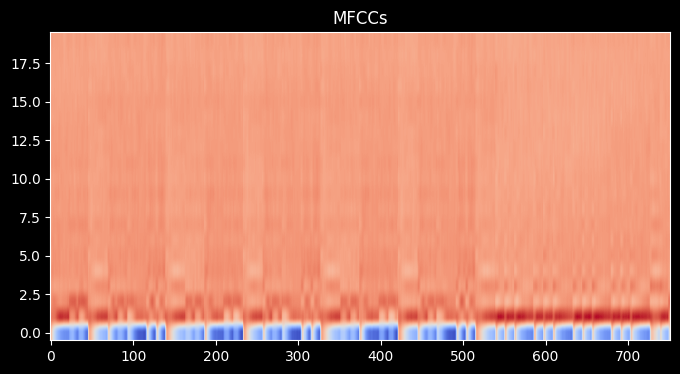

In [66]:
plt.figure(figsize=(8,4))
plt.imshow(mfcc_data, aspect='auto', origin='lower', cmap='coolwarm')
plt.title('MFCCs')

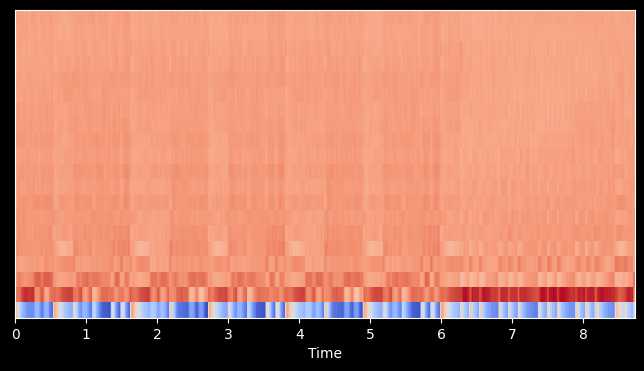

In [67]:
plt.figure(figsize=(8,4))
display.specshow(mfcc_data, sr=fs, x_axis='time')

# Chromagrams

Chromagrams are a representation of the energy of a signal in terms of its *pitch class* (chroma) content. Therefore, the entire spectrum for a segment of audio is projected onto 12 bins representing the 12 distinct semitones (or chroma) of the octave. **The chroma representation tells us the intensity of each of the 12 distinct musical chroma of the octave at each time frame.**

Chromagrams are very useful in a number of frequency-related tasks, such as key detection, chord dectection, and cover song ID, because they capture harmonic and melodic characteristics of music, while being robust to changes in timbre and instrumentation.

Within signal processing, chroma-based audio features are sometimes referred to as "pitch class profiles".

To calculate a chromagram, we take a spectrogram and convert the linear frequency axis to a logarithmic one. The signal is decomposed into a large number of equally-spaced frequency bands with center frequencies typically corresponding to the pitches A0 (midi 21) to C8 (midi 108) (or the 88 piano keys), such that each band is a semitone. 

The chroma content is then calculated by summing the *log-frequency* magnitude spectrum across pitches that have an octave relation (e.g., sum A0 + A1 + A2 ... to get the energy for how much "A" there is in a signal.)

Note that different music scholars use the term **pitch class profile** in different ways. When MIR people say "pitch class profiles" they are referring to how much energy in the signal there is at each pitch class. In music perception and cognition, "pitch class profiles" are perceptually derived scales of how well each scale degree "fits" in a tonal key.

### Librosa functions

Librosa has three *varieties* for computing chromagrams, but we will just be using this one:

* librosa.feature.chroma_stft  

This is the 'basic' chromagram computation.
You must pass either a $y$ value to `feature.chroma_stft` which would be an audio signal, or else an $S$ value, which would be a pre-computed energy (magnitude) spectrum (i.e., STFT via `numpy`)

Package details [here](https://librosa.github.io/librosa/generated/librosa.feature.chroma_stft.html)

In [ ]:
chromagram = chroma_stft(y=sax_data, n_fft=16384,sr=22050, hop_length=2048)

The result is a chroma representation which is a 12-element multidimensional array or matrix, where each row represents the
spectral energy corresponding to one pitch class (i.e. C, C#, D, D#, etc.). Each column represents the subsequent sliding window of each STFT window. (Exactly like regular STFT representation.

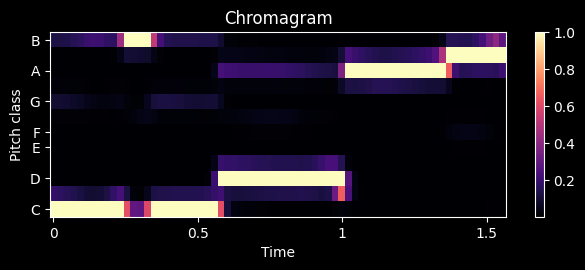

In [ ]:
#plt.figure(figsize=(16, 6))
ax = plt.subplot(2,1,1)
display.specshow(chromagram, y_axis='chroma', x_axis='time') # this creates the graph
plt.colorbar() #this adds the legend
plt.title('Chromagram')
plt.tight_layout()

## In Summary

We've covered a lot of features. Here is a breakdown of what they capture and why/how they are used.

**Time Domain** - directly deals with amplitude changes
- Energy/RMS
    - Signal strength
    - Loudness and dynamics
- ZCR
    - amplitude sign changes
    - higher ZCR/rapid ZCR changes means noisier signal and/or higher frequency content

**Spectral Shape** - how energy is distributed across frequency
- Spectral Centroid
    - Like the mean
    - could tell us "brightness", "center of gravity" of the frequencies
    - used for distinguishing instruments, speech, genre
- Bandwidth
    - Like the range
    - overall frequency span across the signal or within a given frame
- Spectral Spread
    - Like the standard deviation
    - "instantaneous bandwidth", how centered frequencies are around the centroid
    - helps define timbre, noisiness vs tonal sounds
- Spectral Rolloff
    - Like percentile, what frequency a percentage of the energy is concentrated
    - darkness/brightness for low or high frequency content
    - speech vs music and noise vs tonal

**Spectral Dynamics** - change in frequency over time
- Spectral Flux
    - measures how quickly the power spectrum changes over time
    - "velocity" of spectral content
    - onset detection, music vs speech

**Perceptual Representations** - make the spectral domain mimic humans
- MFCC
    - spectral envelope on the mel scale
    - speech detection, speech to text, genre classification
- Chroma
    - pitch class energy distribution
    - key, harmony
